In [147]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [149]:
# Study data files
# Relative path (since the file is in the same directory)
file_path = 'crypto_market_data.csv'

# Load the CSV file into a DataFrame
df_market_data = pd.read_csv(file_path)

# Display the first 10 rows
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [151]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [153]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [155]:
# Separate the columns to normalize (excluding 'coin_id')
columns_to_scale = df_market_data.drop(columns=['coin_id'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (normalize)
scaled_data = scaler.fit_transform(columns_to_scale)



In [157]:
#Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale.columns)

# 4. Copy the 'coin_id' column from the original DataFrame
df_scaled['coin_id'] = df_market_data['coin_id']

# 5. Set 'coin_id' as the index of the DataFrame
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
print("\nScaled DataFrame with 'coin_id' as the index:")
df_scaled.head(10)


Scaled DataFrame with 'coin_id' as the index:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [159]:
# Create a list with the number of k-values from 1 to 11
# Using range to create a list from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [161]:

from sklearn.cluster import KMeans

# 1. Create an empty list to store inertia values
inertia_values = []

# 2. Create a for loop to compute the inertia for k from 1 to 11
for k in range(1, 12):
    # 3. Create a KMeans model using k as the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 4. Fit the model to the scaled data (assuming df_market_data_scaled exists)
    kmeans.fit(df_scaled)  # df_scaled is the DataFrame with normalized data
    
    # 5. Append the inertia value to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

[287.0, 212.1233420748626, 170.19357087970295, 79.02243535120977, 71.0979135124442, 66.10882678044752, 54.488123156241166, 43.224692666580424, 32.86088447122681, 28.404884636873092, 24.116198421409198]


In [163]:


# Create a DataFrame with the data to plot the Elbow curve


# 1. Create a dictionary with k-values and corresponding inertia values
elbow_data = {
    'k': range(1, 12),          # k values from 1 to 11
    'inertia': inertia_values   # The list of inertia values computed in the previous loop
}

# 2. Create a DataFrame with the dictionary
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to check the data
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914


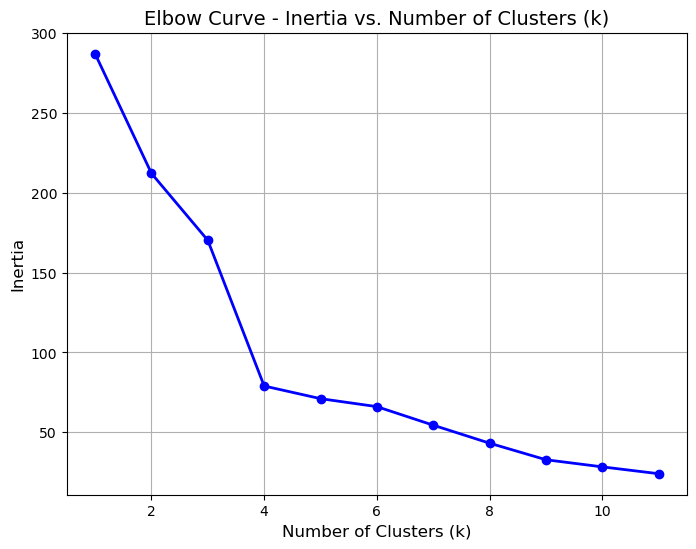

In [165]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


import matplotlib.pyplot as plt

# 1. Plotting the Elbow Curve (line chart) using the inertia values and k-values
plt.figure(figsize=(8, 6))

# Plot the line chart with k on the x-axis and inertia on the y-axis
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding title and labels to the plot
plt.title('Elbow Curve - Inertia vs. Number of Clusters (k)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Adding gridlines for better visualization
plt.grid(True)

# Display the plot
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [168]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [170]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [172]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans.predict(df_scaled)


# Print the resulting array of cluster values.
print("Cluster Predictions for each cryptocurrency:")
print(cluster_predictions)

Cluster Predictions for each cryptocurrency:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [174]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

In [176]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [178]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create the scatter plot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="cluster",             # Color by the predicted clusters
    cmap='Set1',             # Color map for different clusters
    hover_cols=["coin_id"],  # Display the cryptocurrency name on hover
    title="Cryptocurrency Clusters based on Price Changes",  # Plot title
    size=10,                 # Set the size of the points
    width=800,               # Width of the plot
    height=600              # Height of the plot
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [180]:

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Display the PCA model to confirm
print(pca)

PCA(n_components=3)


In [182]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.


# View the scaled PCA data
# Assuming the original DataFrame with 'coin_id' is df_market_data
# Make sure to store the 'coin_id' from the original DataFrame before scaling
coin_ids = df_market_data['coin_id'].values

# Drop the 'coin_id' column from the scaled DataFrame to apply PCA
df_scaled_without_id = df_scaled_copy.drop(columns='cluster')  # Drop 'cluster' if it exists

# Apply PCA to reduce the scaled data to three principal components
pca_result = pca.fit_transform(df_scaled_without_id)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'coin_id' column from the original data back for reference
df_pca['coin_id'] = coin_ids

# Display the PCA-transformed DataFrame
print(df_pca)



         PC1       PC2       PC3               coin_id
0  -0.600667  0.842760  0.461595               bitcoin
1  -0.458261  0.458466  0.952877              ethereum
2  -0.433070 -0.168126 -0.641752                tether
3  -0.471835 -0.222660 -0.479053                ripple
4  -1.157800  2.041209  1.859715          bitcoin-cash
5  -0.516534  1.388377  0.804071           binancecoin
6  -0.450711  0.517699  2.846143             chainlink
7  -0.345600  0.729439  1.478013               cardano
8  -0.649468  0.432165  0.600303              litecoin
9  -0.759014 -0.201200 -0.217653       bitcoin-cash-sv
10 -0.248198 -1.376252 -1.462026      crypto-com-chain
11 -0.438408 -0.175337 -0.663388              usd-coin
12 -0.693425 -0.473815 -0.527597                   eos
13  0.060499  2.909404  1.498571                monero
14 -0.393352 -0.108192 -0.012756                  tron
15 -0.796176 -0.494409  1.082812                 tezos
16  0.064075 -1.269825 -1.098829                   okb
17 -0.4890

In [184]:


# Retrieve the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


In [186]:
# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the total explained variance
print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")


Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [189]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
coin_ids = df_market_data['coin_id'].values

# Set the coin_id column as index
df_pca['coin_id'] = coin_ids
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [191]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [193]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the PCA data (df_pca containing PC1, PC2, PC3)
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])  # Use the PCA components
    
    # Append the inertia value (sum of squared distances) to the list
    inertia_values.append(kmeans.inertia_)

In [195]:


# Create a dictionary with the k-values and their corresponding inertia values
elbow_data = {
    'k': range(1, 12),          # k-values from 1 to 11
    'inertia': inertia_values   # Inertia values for each k
}

# Create a DataFrame with the elbow data
df_elbow = pd.DataFrame(elbow_data)

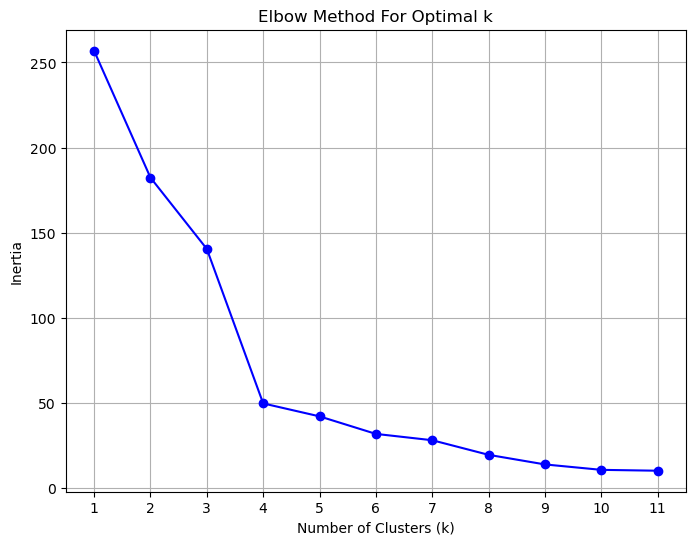

In [197]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


# Plot a line chart with inertia values computed for different k-values
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Ensure k values are shown on x-axis
plt.grid(True)

# Display the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [200]:
# Initialize the K-Means model using the best value for k

# Assume best_k is determined from the Elbow curve (e.g., k = 4)
best_k = 4  # Replace this with the optimal k identified

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [202]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])

KMeans(n_clusters=4, random_state=42)

In [204]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [206]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
print(df_pca_copy)

                           PC1       PC2       PC3  cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        2
ripple               -0.471835 -0.222660 -0.479053        2
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        2
crypto-com-chain     -0.248198 -1.376252 -1.462026        2
usd-coin             -0.438408 -0.175337 -0.663388        2
eos                  -0.693425 -0.473815 -0.527597        2
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [208]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


import hvplot.pandas  # Import hvPlot for DataFrame plotting

# Add a column for the cryptocurrency names from the original DataFrame (df_market_data)
df_pca_copy['coin_id'] = df_market_data['coin_id']  # Assuming df_market_data has the 'coin_id' column

# Create the scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',  # Color points based on the cluster labels
    cmap='viridis',  # You can change the color map if you prefer
    hover_cols=['coin_id'],  # Show the cryptocurrency name when hovering
    title='Cryptocurrency Clusters based on PCA (PC1 vs PC2)', 
    size=10,  # Optional: size of the points
    xlabel='PC1', 
    ylabel='PC2'
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

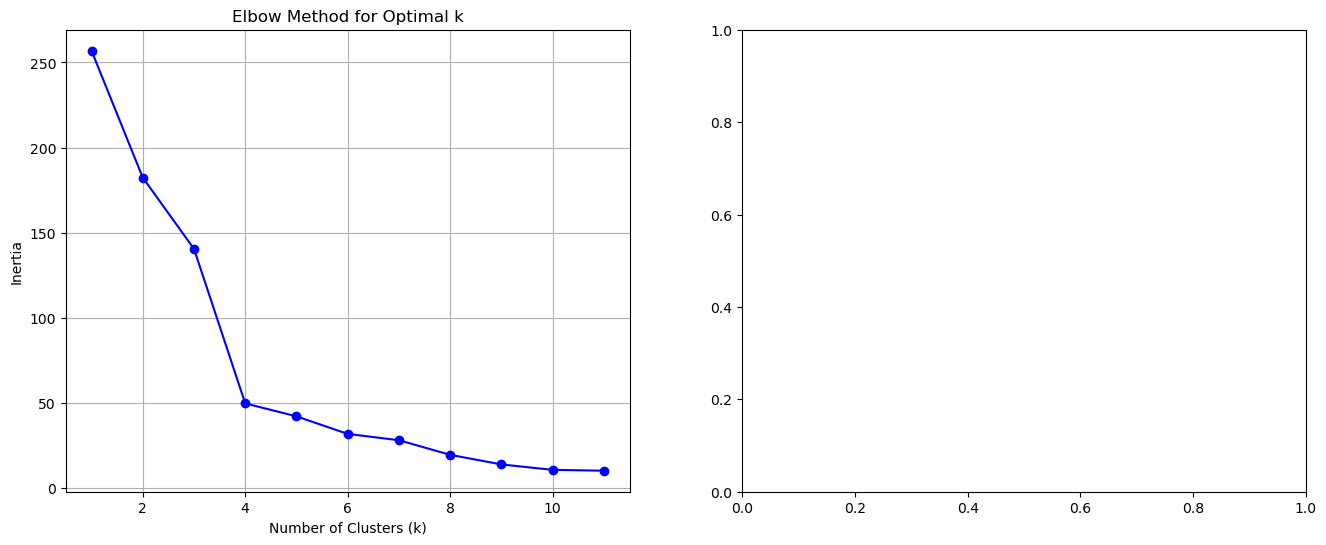

In [210]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a side-by-side plot

# Plot the Elbow Curve using Matplotlib on the first subplot
axes[0].plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

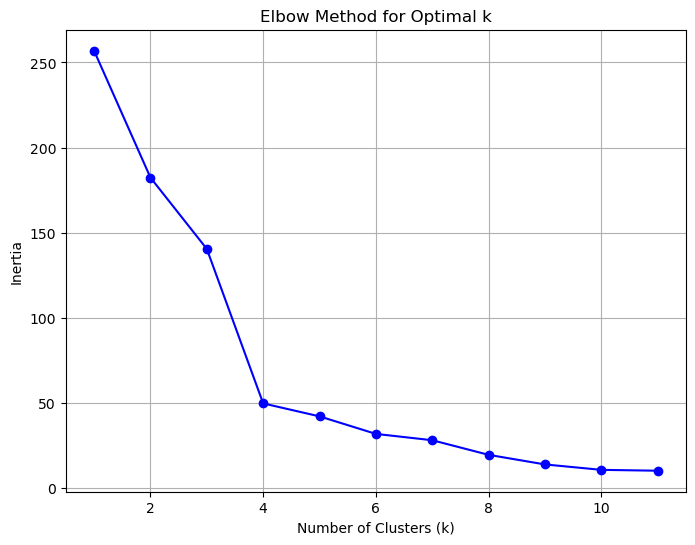

In [212]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df_elbow` with columns 'k' (number of clusters) and 'inertia' (inertia values)
# Example (replace this with your actual data):
# df_elbow = pd.DataFrame({'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'inertia': [500, 400, 350, 300, 275, 250, 230, 215, 205, 200]})

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Show the plot
plt.show()


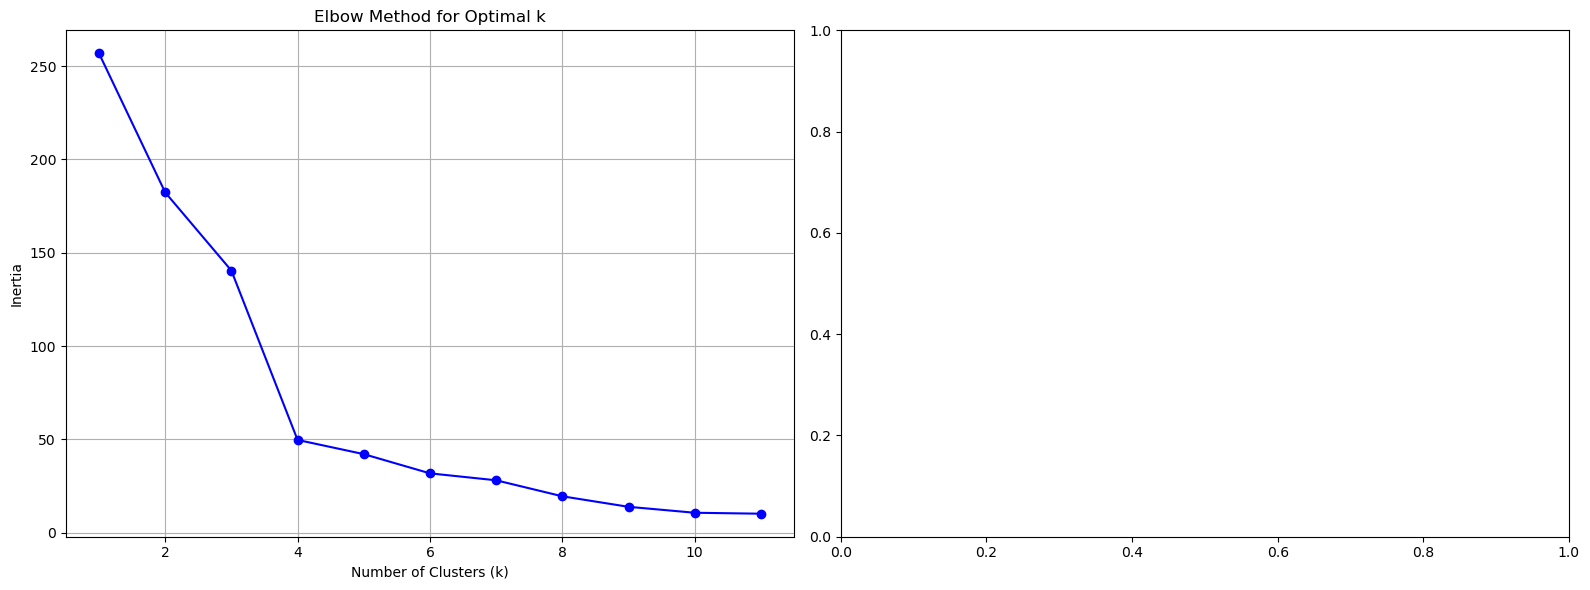

In [214]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
import matplotlib.pyplot as plt
import hvplot.pandas  # Import hvPlot for DataFrame plotting
import pandas as pd

# Elbow Curve Plot using Matplotlib
# Assuming `df_elbow` contains the inertia data with columns `k` and `inertia`.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a side-by-side plot

# Plot the Elbow Curve using Matplotlib on the first subplot
axes[0].plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Cluster Plot using hvPlot
# Add the 'coin_id' to the copy of the PCA DataFrame for hover functionality
df_pca_copy['coin_id'] = df_market_data['coin_id']  # Assuming 'coin_id' exists in df_market_data

# Create the scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',  # Color points based on the cluster labels
    cmap='viridis',  # You can change the color map if you prefer
    hover_cols=['coin_id'],  # Show the cryptocurrency name when hovering
    title='Cryptocurrency Clusters based on PCA (PC1 vs PC2)', 
    size=10,  # Optional: size of the points
    xlabel='PC1', 
    ylabel='PC2'
)

# Display the composite plot in the notebook
scatter_plot.opts(width=600, height=400)  # Adjust the size for the hvPlot graph
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

# The plot will show the elbow curve and clustering plot side by side.


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** I do not see any impact

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas  # Import hvPlot for DataFrame plotting

# Step 1: Save the 'coin_id' column before performing any transformations
coin_ids = df_market_data['coin_id']  # Assuming 'coin_id' exists in df_market_data

# Step 2: Drop 'coin_id' before applying StandardScaler or PCA (if it was done previously)
df_scaled_copy = df_market_data.drop(columns=['coin_id'])

# Step 3: Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled_copy)  # Apply PCA on the scaled data (without 'coin_id')

# Step 4: Create a DataFrame with PCA results (PC1, PC2)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Step 5: Apply KMeans clustering to the PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters based on your analysis
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Step 6: Reattach the 'coin_id' column for hover functionality
df_pca['coin_id'] = coin_ids  # Add 'coin_id' back to the PCA DataFrame for visualization

# Step 7: Create an interactive scatter plot using hvPlot
cluster_plot = df_pca.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',  # Color points based on the cluster labels
    cmap='viridis',  # Color map for clusters
    hover_cols=['coin_id'],  # Show 'coin_id' on hover
    title='Cryptocurrency Clusters (PC1 vs PC2)', 
    size=10,  # Size of the points
    xlabel='PC1', 
    ylabel='PC2'
)

# Display the interactive plot
cluster_plot.opts(width=600, height=400)
cluster_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)